**4c: Train one-level decision trees and multi-level decision trees on the two data sets. Determine the accuracy rates of the resulting classifiers using the training set and hold-out validation.**

In [1]:
import sklearn
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
# Output column (vector) Y (given by the output attribute)
Y_diabetes = diabetes_data['class']
# Input matrix X (i.e. the sub-matrix given by input attributes)
# The output attribute has a name class
X_diabetes = diabetes_data.drop(['class'],axis=1)

In [3]:
# One-level decision trees
clf_diabetes_one = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)

# Multi-level decision trees
clf_diabetes_multi = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=None)

In [4]:
# Hold-out validation of decision trees: the original data set is first split randomly into training data set and test data set. 
# Then a decision tree is trained on the training data and tested on the test data.
X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = train_test_split(X_diabetes, Y_diabetes,
  test_size=0.34, random_state=10)

# Train the decision-tree classifier clf from training data X and Y
clf_diabetes_one = clf_diabetes_one.fit(X_diabetes_train, Y_diabetes_train)
clf_diabetes_multi = clf_diabetes_multi.fit(X_diabetes_train, Y_diabetes_train)

In [5]:
# Assume that we have test data with input matrix Xt and output vector Yt.
# To compute the vector Yp of predictions for Xt provided by the decision-tree classifier clf
Yp_diabetes_one = clf_diabetes_one.predict(X_diabetes_test)
Yp_diabetes_multi = clf_diabetes_multi.predict(X_diabetes_test)

# Accuracy rate acc
acc_diabetes_one = accuracy_score(Y_diabetes_test, Yp_diabetes_one)
acc_diabetes_multi = accuracy_score(Y_diabetes_test, Yp_diabetes_multi)

print("Accuracy of one-level decision trees on diabetes data set:")
print(acc_diabetes_one)
print("Accuracy of multi-level decision trees on diabetes data set:")
print(acc_diabetes_multi)

# We note that, if Xt is X and Yt is Y, the estimate rate acc is the training accuracy rate.

Accuracy of one-level decision trees on diabetes data set:
0.7213740458015268
Accuracy of multi-level decision trees on diabetes data set:
0.7366412213740458


In [6]:
glass_data = pd.read_csv('glass.csv')
Y_glass = glass_data['class']
X_glass = glass_data.drop(['class'],axis=1)

In [7]:
# One-level decision trees
clf_glass_one = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)

# Multi-level decision trees
clf_glass_multi = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=None)


X_glass_train, X_glass_test, Y_glass_train, Y_glass_test = train_test_split(X_glass, Y_glass,
  test_size=0.34, random_state=10)

# Train the decision-tree classifier clf from training data X and Y
clf_glass_one = clf_glass_one.fit(X_glass_train, Y_glass_train)
clf__glass_multi = clf_glass_multi.fit(X_glass_train, Y_glass_train)

In [8]:
Yp_glass_one = clf_glass_one.predict(X_glass_test)
Yp_glass_multi = clf_glass_multi.predict(X_glass_test)

# Accuracy rate acc
acc_glass_one = accuracy_score(Y_glass_test, Yp_glass_one)
acc_glass_multi = accuracy_score(Y_glass_test, Yp_glass_multi)
print("Accuracy of one-level decision trees on glass data set:")
print(acc_glass_one)
print("Accuracy of multi-level decision trees on glass data set:")
print(acc_glass_multi)

Accuracy of one-level decision trees on glass data set:
0.4246575342465753
Accuracy of multi-level decision trees on glass data set:
0.6301369863013698


**4c. Explain why there is a difference in the accuracy rates. Compare one-level decision trees and multi-level decision trees in terms of explainability.**

The accuracy rates of multi-level decision trees are bigger than the accuracy rates of one-level decision trees because in multi-level decision trees, the depth-search is bigger as it has more branches. Thus, multi-level decision trees train and test more of the data and therefore, yield more accurate results.

**4d: Experiment with multi-level decision trees and error pre-pruning by changing the option min_samples_leaf from 0 to the size of the datasets (use some step). (The option min_samples_leaf determines the min number of training instances in the leaf nodes of the decision trees.) Estimate the accuracy rates of the resulting decision trees using the training set and hold-out validation. Plot the accuracy rates based on the training set and hold-out validation for min_samples_leaf from 1 to the size of the datasets with step of 5.**

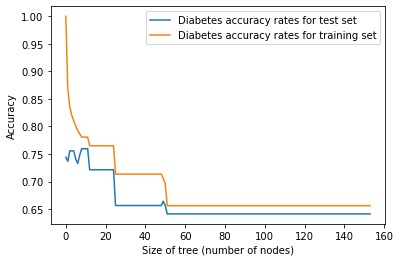

In [9]:
acc_diabetes_test=[]
acc_diabetes_train=[]


for k in range(1, 768, 5): # Number of Instances: 768
    clf_diabetes_multi = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = k, max_depth=None)
    X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = train_test_split(X_diabetes, Y_diabetes,
  test_size=0.34, random_state=10)
    clf_diabetes_multi = clf_diabetes_multi.fit(X_diabetes_train, Y_diabetes_train)
    
    Yp_diabetes_multi_test = clf_diabetes_multi.predict(X_diabetes_test)
    Yp_diabetes_multi_train = clf_diabetes_multi.predict(X_diabetes_train)
    
    acc_diabetes_multi_test = accuracy_score(Y_diabetes_test, Yp_diabetes_multi_test)
    acc_diabetes_multi_train = accuracy_score(Y_diabetes_train, Yp_diabetes_multi_train)
    
    acc_diabetes_test.append(acc_diabetes_multi_test)
    acc_diabetes_train.append(acc_diabetes_multi_train)
    
plt.plot(acc_diabetes_test, '-', label='Diabetes accuracy rates for test set')
plt.plot(acc_diabetes_train,'-', label='Diabetes accuracy rates for training set')
plt.xlabel('Size of tree (number of nodes)')
plt.ylabel('Accuracy')
plt.legend()

**Identify the regions of underfitting, optimality, and overfitting. Explain how you have identified these regions.**

The region of overfitting is from min_samples_leaf=0 (i.e. size of tree=0) to around min_samples_leaf=15 because in this interval the train accuracy decreases while the test accuracy increases. The optmiality region is also in this interval as we can see that at around min_samples_leaf=15, the test accuracy is the highest: around 0.76. The region of underfitting is from around min_samples_leaf=16 to the end as both the test accuracy and the train accuracy decrease in the same pattern. We can also see that from around min_samples_leaf=50 both the test accuracy and the train accuracy become very close to each other and are straight lines that don't change (i.e. they don't increase nor decrease).

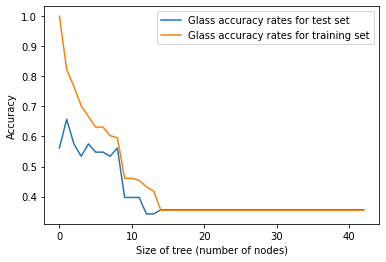

In [10]:
acc_glass_test=[]
acc_glass_train=[]


for l in range(1, 214, 5): # Number of Instances: 214
    clf_glass_multi = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = l, max_depth=None)
    X_glass_train, X_glass_test, Y_glass_train, Y_glass_test = train_test_split(X_glass, Y_glass, test_size=0.34, random_state=10)
    clf_glass_multi = clf_glass_multi.fit(X_glass_train, Y_glass_train)
    
    Yp_glass_multi_test = clf_glass_multi.predict(X_glass_test)
    Yp_glass_multi_train = clf_glass_multi.predict(X_glass_train)
    
    acc_glass_multi_test = accuracy_score(Y_glass_test, Yp_glass_multi_test)
    acc_glass_multi_train = accuracy_score(Y_glass_train, Yp_glass_multi_train)
    
    acc_glass_test.append(acc_glass_multi_test)
    acc_glass_train.append(acc_glass_multi_train)
    
plt.plot(acc_glass_test, '-', label='Glass accuracy rates for test set')
plt.plot(acc_glass_train,'-', label='Glass accuracy rates for training set')
plt.xlabel('Size of tree (number of nodes)')
plt.ylabel('Accuracy')
plt.legend()

**Identify the regions of underfitting, optimality, and overfitting. Explain how you have identified these regions.**

The region of overfitting is from min_samples_leaf=0 (i.e. size of tree=0) to around min_samples_leaf=8 because in this interval the train accuracy decreases while the test accuracy increases. The optmiality region is also in this interval as we can see that at around min_samples_leaf=1, the test accuracy is the highest: around 0.68. The region of underfitting is from around min_samples_leaf=9 to the end as both the test accuracy and the train accuracy decrease in the same pattern. We can also see that from around min_samples_leaf=13 both the test accuracy and the train accuracy become almost one straight lines (i.e. there's overlap) that doesn't change (i.e. it doesn't increase nor decrease).